# Neural Network from scratch

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
data =  pd.read_csv('train.csv')

data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_features = data[0:1000].T
Y_features = data_features[0]
X_features = data_features[1:n]
X_features = X_features / 255

data_labels = data[1000:m].T
Y_train = data_labels[0]
X_train = data_labels[1:n]
X_train = X_train / 255

(784,)

In [56]:
def init_params():
    """
    Initialize the parameters of the neural network.
    W1: weights for the first layer
    b1: biases for the first layer
    W2: weights for the second layer
    b2: biases for the second layer
    """
    
    # W1: 10x784, b1: 10x1
    # 10 neurons in the first layer, 784 inputs (28x28 images)
    W1 = np.random.rand(10, 784) - 0.5
    # W2: 10x10, b2: 10x1
    # 10 neurons in the second layer (output layer)
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    """
    ReLU activation function
    Z: input to the activation function
    Returns the activated output
    """
    return np.maximum(Z, 0)

def softmax(Z):
    """
    Softmax activation function
    Z: input to the activation function
    Returns the activated output
    """
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    """
    Forward propagation through the network
    W1: weights for the first layer
    b1: biases for the first layer
    W2: weights for the second layer
    b2: biases for the second layer
    X: input data
    Returns the activated outputs of each layer
    """

    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    """
    Convert labels to one-hot encoding
    Y: labels
    Returns one-hot encoded labels
    """
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    """
    Backward propagation through the network
    Z1: input to the first layer
    A1: activated output of the first layer
    Z2: input to the second layer
    A2: activated output of the second layer
    W1: weights for the first layer
    W2: weights for the second layer
    X: input data
    Y: labels
    Returns gradients of the weights and biases
    """

    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    """
    Update the parameters of the network using gradient descent
    W1: weights for the first layer
    b1: biases for the first layer
    W2: weights for the second layer
    b2: biases for the second layer
    dW1: gradients of the weights for the first layer
    db1: gradients of the biases for the first layer
    dW2: gradients of the weights for the second layer
    db2: gradients of the biases for the second layer
    alpha: learning rate
    Returns updated weights and biases
    """
    
    W1 -= alpha * dW1
    b1 -= alpha * db1    
    W2 -= alpha * dW2  
    b2 -= alpha * db2    
    return W1, b1, W2, b2


In [58]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    """
    Gradient descent algorithm to train the neural network
    X: input data
    Y: labels
    alpha: learning rate
    iterations: number of iterations
    Returns the trained weights and biases
    """
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [63]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 400)

Iteration:  0
[2 3 8 ... 0 4 7] [6 1 0 ... 1 0 5]
0.08680487804878048
Iteration:  10
[2 2 0 ... 8 4 8] [6 1 0 ... 1 0 5]
0.11748780487804877
Iteration:  20
[2 2 0 ... 8 4 8] [6 1 0 ... 1 0 5]
0.16585365853658537
Iteration:  30
[2 1 0 ... 1 0 8] [6 1 0 ... 1 0 5]
0.22953658536585367
Iteration:  40
[2 1 0 ... 1 0 1] [6 1 0 ... 1 0 5]
0.2893170731707317
Iteration:  50
[6 1 0 ... 1 0 1] [6 1 0 ... 1 0 5]
0.3406829268292683
Iteration:  60
[6 1 0 ... 1 0 1] [6 1 0 ... 1 0 5]
0.40131707317073173
Iteration:  70
[6 1 0 ... 1 0 5] [6 1 0 ... 1 0 5]
0.4620487804878049
Iteration:  80
[6 1 0 ... 1 0 5] [6 1 0 ... 1 0 5]
0.5105365853658537
Iteration:  90
[6 1 0 ... 1 0 5] [6 1 0 ... 1 0 5]
0.5487073170731708
Iteration:  100
[6 1 0 ... 1 0 5] [6 1 0 ... 1 0 5]
0.5807560975609756
Iteration:  110
[6 1 0 ... 1 0 5] [6 1 0 ... 1 0 5]
0.6072439024390244
Iteration:  120
[6 1 0 ... 1 0 5] [6 1 0 ... 1 0 5]
0.6293658536585366
Iteration:  130
[6 1 0 ... 1 0 5] [6 1 0 ... 1 0 5]
0.6486585365853659
Iteration:  

In [64]:
def make_prediction(X, W1, b1, W2, b2):
    """
    Make predictions using the trained neural network.
    
    Parameters:
    W1 (numpy.ndarray): Weights for layer 1
    b1 (numpy.ndarray): Biases for layer 1
    W2 (numpy.ndarray): Weights for layer 2
    b2 (numpy.ndarray): Biases for layer 2
    X (numpy.ndarray): Input data
    
    Returns:
    numpy.ndarray: Predicted labels
    """
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    return get_predictions(A2)

def test_prediction(index, W1, b1, W2, b2):
    """
    Test the predictions of the neural network.
    
    Parameters:
    W1 (numpy.ndarray): Weights for layer 1
    b1 (numpy.ndarray): Biases for layer 1
    W2 (numpy.ndarray): Weights for layer 2
    b2 (numpy.ndarray): Biases for layer 2
    X (numpy.ndarray): Input data
    Y (numpy.ndarray): True labels
    
    Returns:
    float: Accuracy of the predictions
    """
    images = X_train[:, index, None]
    predictions = make_prediction(X_train[:, index, None], W1, b1, W2, b2)
    labels = Y_train[index]

    images = images.reshape((28, 28)) * 255
    accuracy = get_accuracy(predictions, labels)
    plt.title(f"Predicted: {predictions}, Actual: {labels}" f"Accuracy: {accuracy}")
    plt.imshow(images, cmap='gray')

[7] 9


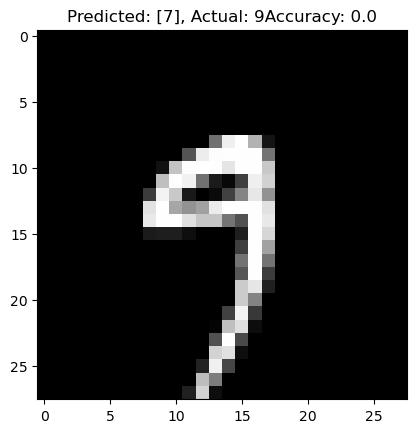

In [70]:
test_prediction(784, W1, b1, W2, b2)